### Multi-processing

- Multiprocessing is the utilization of two or more CPUs simultaneously in a single computer system. 

In [1]:
import multiprocessing as mp

##### get number of CPUs

In [2]:
mp.cpu_count()

4

##### The Process class:  allows spawning processes (threads) and execute them calling its start() method

In [3]:
from multiprocessing import Process
import os

In [4]:
def myfunc(name):
    print('module %s, ppid %s, Hello %s from pid %s  ' %(__name__, os.getppid(), name, os.getpid()))

In [5]:
p = Process(target = myfunc, args = ('CEIABD', ))
p.start()
p.join()

module __main__, ppid 86706, Hello CEIABD from pid 86717  


##### The Pool class: creating a pool of workers

In [6]:
from multiprocessing.pool import Pool

In [7]:
mypool = Pool(processes = 8)
mypool.map(myfunc, ['Gaurav', 'Abel', 'Grigor', 'Jaume', 'Oriol', 'Aniol', 'Miquel', 'Joan'])
mypool.close()
mypool.terminate()

module __main__, ppid 86706, Hello Abel from pid 86723  module __main__, ppid 86706, Hello Aniol from pid 86727  module __main__, ppid 86706, Hello Grigor from pid 86724  module __main__, ppid 86706, Hello Gaurav from pid 86722  

module __main__, ppid 86706, Hello Miquel from pid 86728  
module __main__, ppid 86706, Hello Joan from pid 86729  


module __main__, ppid 86706, Hello Oriol from pid 86726  module __main__, ppid 86706, Hello Jaume from pid 86725  



#### pooling the output

In [8]:
def worker(name):
    return 'module %s, ppid %s, Hello %s from pid %s  ' %(__name__, os.getppid(), name, os.getpid())

In [9]:
mypool = Pool(processes = mp.cpu_count())
outQ = mypool.map(worker, ['Gaurav', 'Abel', 'Grigor', 'Jaume', 'Oriol', 'Aniol', 'Miquel', 'Joan'])
mypool.close()
mypool.terminate()
for q in outQ: print(q)

module __main__, ppid 86706, Hello Gaurav from pid 86765  
module __main__, ppid 86706, Hello Abel from pid 86766  
module __main__, ppid 86706, Hello Grigor from pid 86767  
module __main__, ppid 86706, Hello Jaume from pid 86765  
module __main__, ppid 86706, Hello Oriol from pid 86766  
module __main__, ppid 86706, Hello Aniol from pid 86765  
module __main__, ppid 86706, Hello Miquel from pid 86766  
module __main__, ppid 86706, Hello Joan from pid 86765  


- the ***with*** clause: automatic termination of the pool

In [10]:
with Pool(processes = mp.cpu_count()) as pool:
    outQ = pool.map(worker, ['Gaurav', 'Abel', 'Grigor', 'Jaume', 'Oriol', 'Aniol', 'Miquel', 'Joan'])
for q in outQ: print(q)

module __main__, ppid 86706, Hello Gaurav from pid 86772  
module __main__, ppid 86706, Hello Abel from pid 86772  
module __main__, ppid 86706, Hello Grigor from pid 86774  
module __main__, ppid 86706, Hello Jaume from pid 86775  
module __main__, ppid 86706, Hello Oriol from pid 86772  
module __main__, ppid 86706, Hello Aniol from pid 86774  
module __main__, ppid 86706, Hello Miquel from pid 86773  
module __main__, ppid 86706, Hello Joan from pid 86773  


### Example. 

We use multiprocessing to make multiple estimations of $\pi$ following the heuristic of the previous notebook.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### Estimate $\pi$ in 2D

In [12]:
def pi2d_(parms):
    n_in, pi2d = 0, []
    np.random.seed(parms[1])
    for i in range(1, parms[0]):
        if np.sqrt(np.sum(np.random.rand(2)**2)) <= 1:
            n_in += 1
        pi2d.append(4 *n_in/i)
    return pi2d

##### run 100 independent estimations (5000 iterations/each)

In [13]:
%%time
runs, iters = 100, 5000
with Pool(processes = mp.cpu_count()) as pool:
    outQ2D = pool.map(pi2d_, [(iters, r) for r in np.random.randint(1, 1000, runs)])

CPU times: user 94.7 ms, sys: 38.9 ms, total: 134 ms
Wall time: 2.31 s


##### estimated value of pi  after each run

In [14]:
# show only first 10 estimations
[q[-1] for q in outQ2D][:10]

[3.116623324664933,
 3.127025405081016,
 3.179035807161432,
 3.142228445689138,
 3.144628925785157,
 3.1558311662332468,
 3.1518303660732148,
 3.112622524504901,
 3.160632126425285,
 3.1358271654330867]

#### Estimate $\pi$ in 10D

In [15]:
def pi10d_(parms):
    n_in, pi10d = 0, []
    np.random.seed(parms[1])
    for i in range(1, parms[0]):
        if np.sqrt(np.sum(np.random.rand(10)**2)) <= 1:
            n_in += 1
        pi10d.append(4 *(120 *n_in/i)**(1/5))
    return pi10d

##### run 100 independent estimations (500000 iterations/each)

In [16]:
%%time
runs, iters = 100, 5000
with Pool(processes = mp.cpu_count()) as pool:
    outQ10D = pool.map(pi10d_, [(iters, r) for r in np.random.randint(1, 1000, runs)])

CPU times: user 88 ms, sys: 47.3 ms, total: 135 ms
Wall time: 2.53 s


##### estimated value of pi  after each run

In [17]:
# show only first 10 estimations
[q[-1] for q in outQ10D][:10]

[3.3032664750974194,
 3.0069043488092513,
 3.0647718516237092,
 2.7998787290920326,
 3.2609028849752315,
 3.118572625618606,
 3.2609028849752315,
 3.343562128467545,
 3.1688981695513694,
 3.1688981695513694]

#### Compare the mean and var of 2D and 10D estimations

In [18]:
# get each run last estimated value 
pi2d = [q[-1] for q in outQ2D]
pi10d = [q[-1] for q in outQ10D]

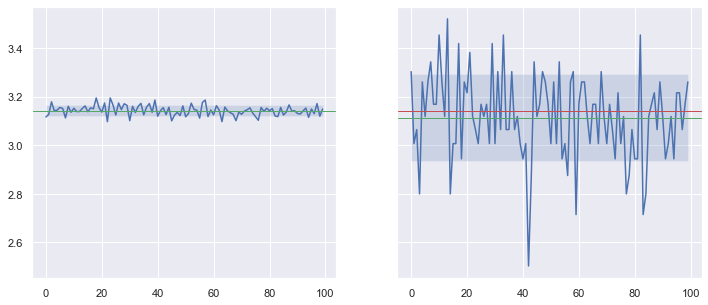

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5), sharex = True, sharey = True)
# estimated values
axs[0].plot(pi2d)
axs[1].plot(pi10d)
# pi value
axs[0].axhline(np.pi, c = 'r', linewidth = 1.0)
axs[1].axhline(np.pi, c = 'r', linewidth = 1.0)
# mean
axs[0].axhline(np.mean(pi2d), c = 'g', linewidth = 1.0)
axs[1].axhline(np.mean(pi10d), c = 'g', linewidth = 1.0)
# standard deviation
lw, up = np.mean(pi2d) -np.std(pi2d), np.mean(pi2d) +np.std(pi2d)
axs[0].fill_between(np.arange(len(pi2d)), lw, up, alpha = 0.2)    
lw, up = np.mean(pi10d) -np.std(pi10d), np.mean(pi10d) +np.std(pi10d)
axs[1].fill_between(np.arange(len(pi10d)), lw, up, alpha = 0.2);    